<a href="https://colab.research.google.com/github/pijushroy35/ml_project-repo/blob/main/Copy_of_Mobile_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn. model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [38]:
!pip install ydata-profiling

In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title = 'mobile_price_prediction',explorative=True)
profile.to_file('ydata.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 61.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


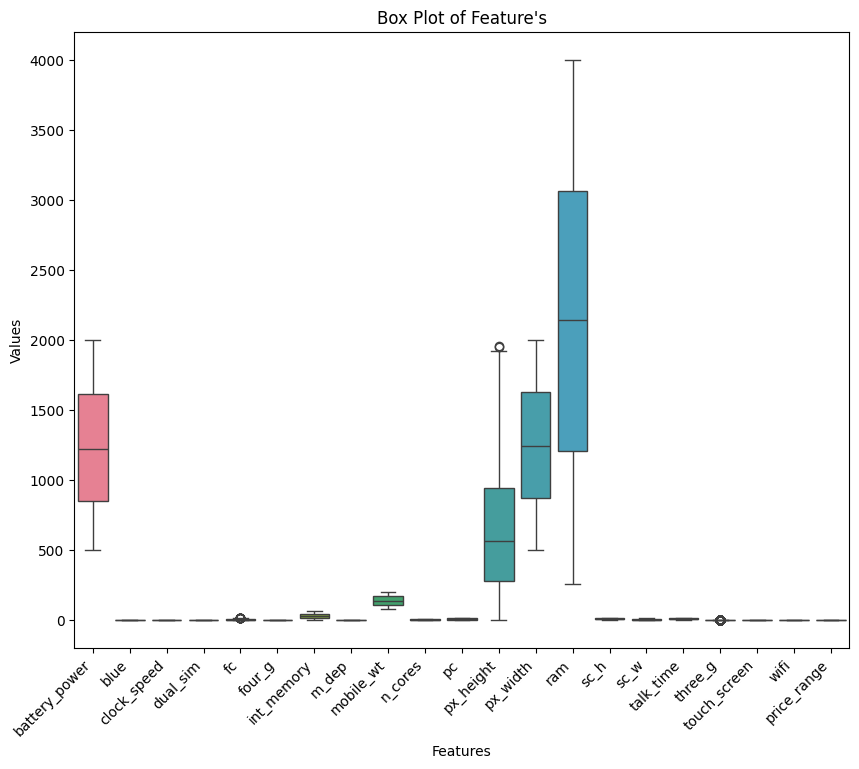

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Box Plot of Feature's")
plt.show()

separate x & y

In [43]:
X=df.drop('price_range',axis=1)
y=df['price_range']


In [44]:
numeric_columns=X.select_dtypes(include=['int64','float64']).columns
print(numeric_columns)
#print(categoric_columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [45]:
categoric_columns=X.select_dtypes(include='object').columns
print(categoric_columns)

Index([], dtype='object')


pipeline process

In [46]:
num_pipe = Pipeline(
    steps=[
       ('imputer',SimpleImputer(strategy='median')),
       ('scaler',StandardScaler())
    ]
)

In [47]:
# cat_transformar = Pipeline(
#   steps=[
#        ('imputer',SimpleImputer(strategy='most_frequent')),
#        ('onehot',OneHotEncoder(handle_unknown='ignore'))
#     ]
# )

In [48]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num',StandardScaler(),numeric_columns),
#         ('cat',OneHotEncoder(handle_unknown='ignore'),categoric_columns)
#     ]
# )

train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,
    random_state=42
    )


In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600, 20)
X_test shape: (1600, 20)
y_train shape: (1600,)
y_test shape: (400,)


performing model

In [51]:
#base line model
lgr_clf = LogisticRegression(max_iter=100)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
xgb_clf = XGBClassifier(n_estimators=100 ,learning_rate=0.5 ,random_state=42 )
knn_clf = KNeighborsClassifier(n_neighbors=10)
svm_clf = SVC(kernel='linear', C=1, random_state=42)


In [52]:
#voting ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lgr',lgr_clf),
        ('rf',rf_clf),
        ('xgb',xgb_clf),
        ('svm',svm_clf)
    ]
)

In [53]:
#stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('rf',rf_clf),
        ('xgb',xgb_clf),
        ('svm',svm_clf)
    ]
)

In [71]:
# model Train
import warnings
warnings.filterwarnings('ignore')

model_train = {
    'lgr': lgr_clf,
    'rf': rf_clf,
    'xgb': xgb_clf,
    'svm': svm_clf,
    'voting': voting_clf,
    'stacking': stacking_clf
}

In [72]:
#training & Evaluation
results = []

for name, model in model_train.items():

    pipe = Pipeline(
        steps=[
            ('preprocessor', num_pipe),
            ('model', model)
        ]
    )

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Result DataFrame
results_df = pd.DataFrame(results).sort_values(
    by="F1 Score",
    ascending=False
)

print(results_df)


      Model  Accuracy  Precision  Recall  F1 Score
0       lgr    0.9750   0.975946  0.9750  0.975020
5  stacking    0.9725   0.972876  0.9725  0.972496
3       svm    0.9700   0.972563  0.9700  0.970197
4    voting    0.9400   0.941539  0.9400  0.940165
2       xgb    0.9050   0.907747  0.9050  0.905345
1        rf    0.8925   0.894473  0.8925  0.892960


In [74]:
import warnings
warnings.filterwarnings('ignore')

best_model = results_df.iloc[0]['Model']
best_model_obj = model_train[best_model]
best_model_obj

LogisticRegression()

In [75]:
final_pipe = Pipeline(
    [
        ('preprocessor',num_pipe),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final Model Accuracy: {accuracy}")

Final Model Accuracy: 0.975


# *cross validaton*

logistic regression cross validation

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [77]:
#for logistic_classification cross validation

lgr_clf_pipeline = Pipeline(
    steps = [
        ('preprocessor',num_pipe),
        ('model',LogisticRegression(max_iter=100))
    ]
)


In [78]:
cv_scores = cross_val_score(
    estimator=lgr_clf_pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

In [79]:


# 2. Report robustness metrics
print(f"Scores for each fold: {cv_scores}")
print(f"Average Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Scores for each fold: [0.95006344 0.94985709 0.94655936 0.93451525 0.96880475]
Average Accuracy: 0.9500
Standard Deviation: 0.0110


stacking_clf cross validation

In [80]:
stacking_pipeline = Pipeline(
    steps=[
        ('preprocessor', num_pipe),
        ('model', stacking_clf)
    ]
)

cv_scores = cross_val_score(
    stacking_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

print("F1 score for each fold:", cv_scores)
print("Average F1 Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

F1 score for each fold: [0.95006344 0.95944206 0.94950654 0.92529221 0.96564467]
Average F1 Score: 0.9499897847806414
Standard Deviation: 0.013745035583637395


grid search cv for hyperparameter tuning

In [81]:
# pipeline
lgr_clf_pipeline = Pipeline(
    steps = [
        ('preprocessor',num_pipe),
        ('model',LogisticRegression(max_iter=100))
    ]
)

In [82]:
param_grid = {
    'model__max_iter': [100, 200, 300],
    'model__C': [0.1, 1, 10],
    'model__solver': ['lbfgs']
}

In [83]:
grid_search = GridSearchCV(
    estimator=lgr_clf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

In [84]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10],
                         'model__max_iter': [100, 200, 300],
                         'model__solver': ['lbfgs']},
             scoring='f1_weighted', verbose=1)

In [85]:
print("Best F1 Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best F1 Score: 0.9599588282863882
Best Parameters: {'model__C': 10, 'model__max_iter': 100, 'model__solver': 'lbfgs'}


random search cv

# *Save model*

In [86]:
import pickle
with open( 'stocking_model.pkl', "wb" ) as file:
  pickle.dump( grid_search, file )

# *mlflow*

In [87]:
!pip install mlflow
import mlflow

In [88]:
mlflow.set_tracking_uri("file:///content/mlruns")
from sklearn.linear_model import LogisticRegression
import mlflow.sklearn

for lgr pipeline+parameter grid setup

In [93]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# MLflow experiment setup
mlflow.set_experiment("Student performance using LogisticRegression")


# Hyperparameters
my_params = {
    'max_iter': 200,
    'C': 1,
    'solver': 'lbfgs'
}
# Pipeline
lgr_clf_pipeline = Pipeline([
    ('preprocessor', num_pipe),
    ('model', LogisticRegression(**my_params))
])

mlflow run+train

In [94]:
# Start MLflow run
with mlflow.start_run(run_name="Single_LR"):

    # Log hyperparameters
    mlflow.log_params(my_params)
    mlflow.log_param("model_type", "LogisticRegression")

    # Train
    lgr_clf_pipeline.fit(X_train, y_train)

    # Predict on train set
    y_train_pred = lgr_clf_pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Log train metrics
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("train_precision", train_precision)
    mlflow.log_metric("train_recall", train_recall)
    mlflow.log_metric("train_f1", train_f1)

    # Predict on test set
    y_test_pred = lgr_clf_pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Log test metrics
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_f1", test_f1)

    # Log model
    mlflow.sklearn.log_model(lgr_clf_pipeline, "logistic_regression_model")

    print("MLflow run completed!")
    print(f"Test F1 Score: {test_f1:.4f}")

2026/01/18 18:38:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MLflow run completed!
Test F1 Score: 0.9750
